# **Network Intrusion Detection System**

- UGR Network Dataset

Perform the project as follows;

- Data Analysis
- Preprocess Data
- Get Insights
- Save Sample of DAta
- Machine Learning Models
  - Supervised
      - Random Forest Model
      - Decision Tree Algorithm
      -
  -  Autoencoders - - - Anomaly Detection


In [ ]:
import os

import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from google.colab import drive

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

Load Data and Get Basic inghts

In [ ]:
import os
# Mounting Google Drive to access data
drive.mount('/content/drive')

# Define the file path /content/drive/MyDrive/azizah_alqahtani_project/UGR/ UGR_sample_5M.csv
file_path = '/content/drive/MyDrive/azizah_alqahtani_project/UGR/UGR_sample_5M.csv'

# Check if the file exists
if os.path.exists(file_path):
    print("File exists.")
else:
    print("File does not exist.")

ugr_df = pd.read_csv(file_path)

# Inspect the columns of the DataFrame
print(ugr_df.columns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File exists.
Index(['Date time', 'Duration', 'Source IP', 'Destination IP', 'Source Port',
       'Destination Port', 'Protocol', 'Flag', 'Forwarding status', 'ToS',
       'Packets', 'Bytes', 'Label'],
      dtype='object')


In [ ]:
ugr_df.columns = ['date_time', 'duration', 'source_ip', 'destination_ip', 'source_port',
       'destination_port', 'protocol', 'flag', 'forwarding_status', 'tos',
       'packets', 'bytes', 'label']

In [ ]:
ugr_df.head()

,date_time,duration,source_ip,destination_ip,source_port,destination_port,protocol,flag,forwarding_status,tos,packets,bytes,label
0,2016-07-27 13:43:29,0.0,143.72.8.137,42.219.158.161,53.0,43192.0,UDP,.A....,0.0,0.0,1.0,214.0,background
1,2016-07-27 13:43:29,0.0,42.219.154.119,143.72.8.137,60185.0,53.0,UDP,.A....,0.0,0.0,1.0,72.0,background
2,2016-07-27 13:43:30,0.0,42.219.154.107,143.72.8.137,48598.0,53.0,UDP,.A....,0.0,0.0,1.0,77.0,background
3,2016-07-27 13:43:30,0.0,42.219.154.98,143.72.8.137,51465.0,53.0,UDP,.A....,0.0,0.0,1.0,63.0,background
4,2016-07-27 13:43:30,0.0,43.164.49.177,42.219.155.26,80.0,37934.0,TCP,.A...F,0.0,0.0,1.0,52.0,background


In [ ]:
ugr_df.tail()

,date_time,duration,source_ip,destination_ip,source_port,destination_port,protocol,flag,forwarding_status,tos,packets,bytes,label
1153028,2016-07-28 11:25:30,0.204,42.219.155.56,176.206.158.43,80.0,54784.0,TCP,.AP.SF,0.0,0.0,9.0,8051.0,background
1153029,2016-07-28 11:25:30,0.340,42.219.158.242,57.41.5.186,44152.0,25.0,TCP,.AP.SF,0.0,0.0,5.0,274.0,background
1153030,2016-07-28 11:25:30,0.368,42.219.155.56,211.52.176.242,80.0,50644.0,TCP,.AP.SF,0.0,0.0,13.0,14966.0,background
1153031,2016-07-28 11:25:30,0.532,208.91.91.39,42.219.153.72,60922.0,25.0,TCP,.AP.SF,0.0,0.0,22.0,14545.0,background
1153032,2016-07-28 11:25:30,24.540,214.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**DAta Descriptive Analysis**

In [ ]:
ugr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1153033.0,4.932706,2.530933e+01,0.0,0.0,0.248,2.988,1.805850e+03
source_port,1153032.0,24162.245856,2.418125e+04,0.0,80.0,17018.000,49576.000,6.553500e+04
destination_port,1153032.0,20456.364555,2.418129e+04,0.0,80.0,445.000,47604.000,6.553500e+04
forwarding_status,1153032.0,0.000000,0.000000e+00,0.0,0.0,0.000,0.000,0.000000e+00
tos,1153032.0,9.373182,2.332820e+01,0.0,0.0,0.000,0.000,2.240000e+02
packets,1153032.0,35.659205,5.360107e+03,1.0,1.0,2.000,8.000,2.891215e+06
bytes,1153032.0,28247.375812,7.198560e+06,28.0,85.0,197.000,1190.000,4.294966e+09


In [ ]:
ugr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153033 entries, 0 to 1153032
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   date_time          1153033 non-null  object 
 1   duration           1153033 non-null  float64
 2   source_ip          1153033 non-null  object 
 3   destination_ip     1153032 non-null  object 
 4   source_port        1153032 non-null  float64
 5   destination_port   1153032 non-null  float64
 6   protocol           1153032 non-null  object 
 7   flag               1153032 non-null  object 
 8   forwarding_status  1153032 non-null  float64
 9   tos                1153032 non-null  float64
 10  packets            1153032 non-null  float64
 11  bytes              1153032 non-null  float64
 12  label              1153032 non-null  object 
dtypes: float64(7), object(6)
memory usage: 114.4+ MB


Null values in data

In [ ]:
# Finding the number of null values in each column
null_values_count = ugr_df.isnull().sum()

# printing the null values count
print("Null Values Count Per Column:")
print("-" * 30)
for column, count in null_values_count.items():
    print(f"{column}: {count}")
print("-" * 30)

Null Values Count Per Column:
------------------------------
date_time: 0
duration: 0
source_ip: 0
destination_ip: 1
source_port: 1
destination_port: 1
protocol: 1
flag: 1
forwarding_status: 1
tos: 1
packets: 1
bytes: 1
label: 1
------------------------------


Duplicates Entries in Data

In [ ]:
duplicates = ugr_df.duplicated()
duplicates_count = duplicates.sum()
print(f"Total Duplicated Entries: {duplicates_count}")

Total Duplicated Entries: 0


**Exploratory Data Analysis**

In [ ]:
ugr_df['date_time'] = pd.to_datetime(ugr_df['date_time'])
ugr_df = ugr_df.sort_values(by='date_time')

In [ ]:
start_date = ugr_df['date_time'].min()
end_date = ugr_df['date_time'].max()

# printing the date range
print(f"Data Date-Time Range:")
print("-" * 30)
print(f"Start Date: {start_date.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End Date: {end_date.strftime('%Y-%m-%d %H:%M:%S')}")
print("-" * 30)

Data Date-Time Range:
------------------------------
Start Date: 2016-07-27 13:43:29
End Date: 2016-07-28 11:25:30
------------------------------


Daily Packets and Bytes Volume Analysis

In [ ]:
aggregated_data = ugr_df.resample('D', on='date_time').agg({'packets':'sum', 'bytes':'sum'})
aggregated_data

,packets,bytes
date_time,,
2016-07-27,26574524.0,2.317478e+10
2016-07-28,14541681.0,9.395347e+09


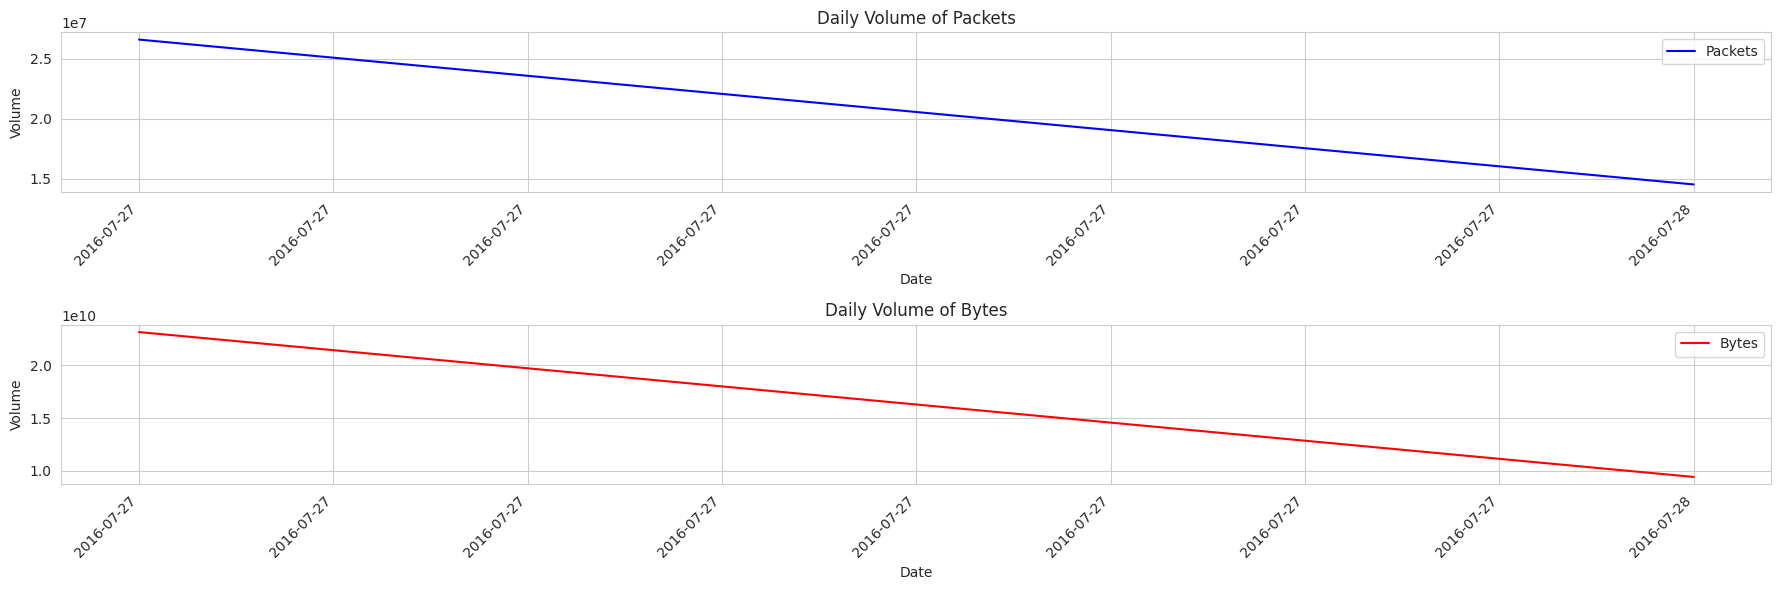

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6))

# Plotting the daily volume of packets
axs[0].plot(aggregated_data.index, aggregated_data['packets'], label='Packets', color='blue')
axs[0].set_title('Daily Volume of Packets')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Volume')
axs[0].legend()
axs[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right")

# Plotting the daily volume of bytes
axs[1].plot(aggregated_data.index, aggregated_data['bytes'], label='Bytes', color='red')
axs[1].set_title('Daily Volume of Bytes')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].legend()
axs[1].xaxis.set_major_locator(mdates.AutoDateLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

**Protocol Usage Over Time**

In [ ]:
protocol_time_series = ugr_df.groupby([pd.Grouper(key='date_time', freq='D'), 'protocol']).size().unstack(fill_value=0)
protocol_time_series

protocol,ESP,GRE,ICMP,IPIP,IPv6,TCP,UDP
date_time,,,,,,,
2016-07-27,135,402,5776,34,22,420133,166440
2016-07-28,199,440,6321,29,22,390957,162122


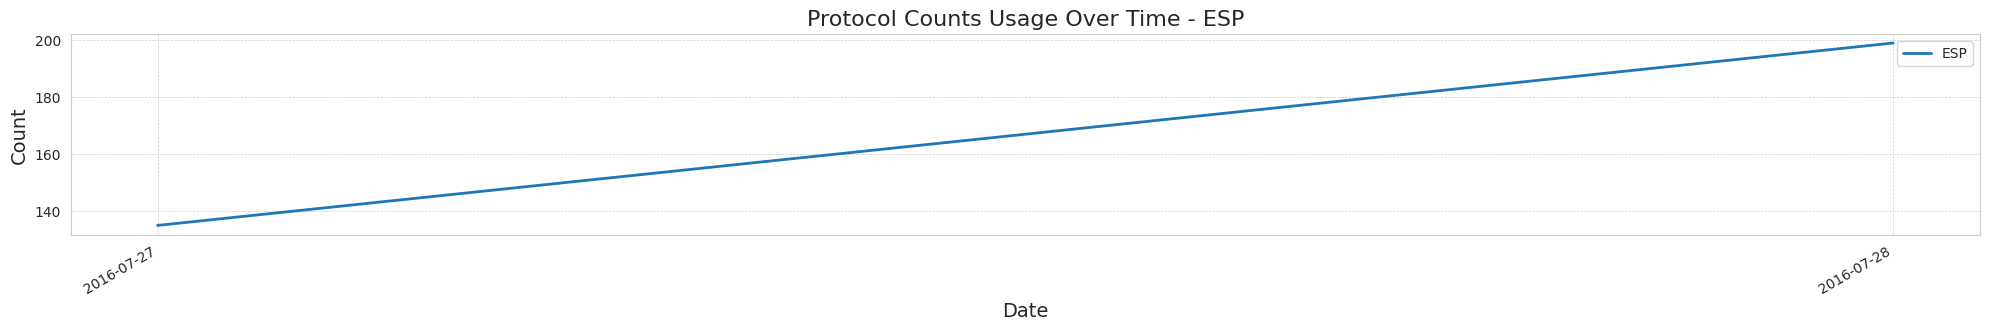

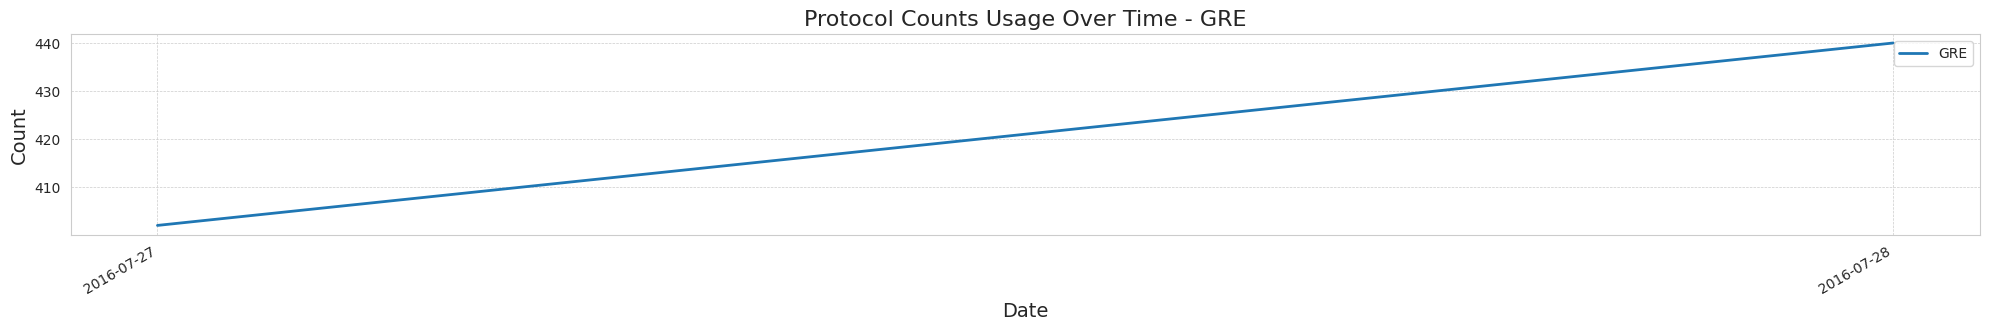

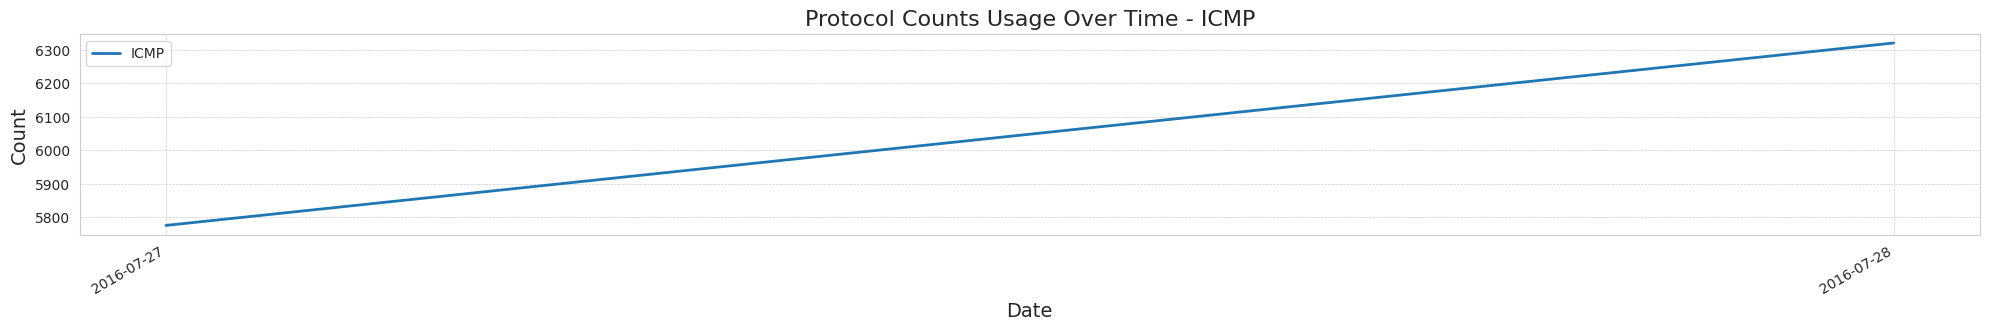

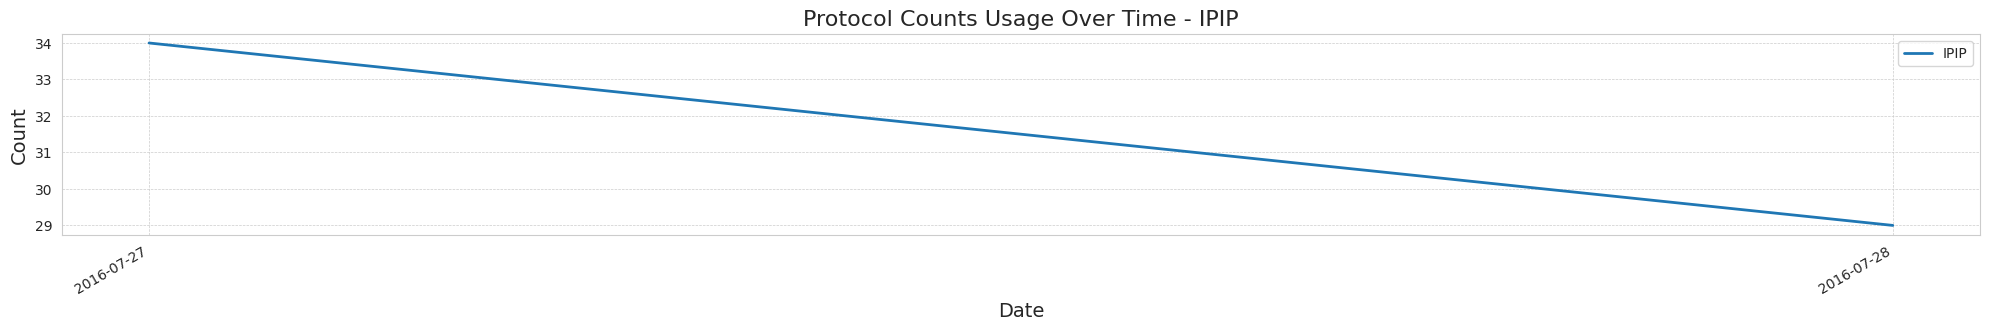

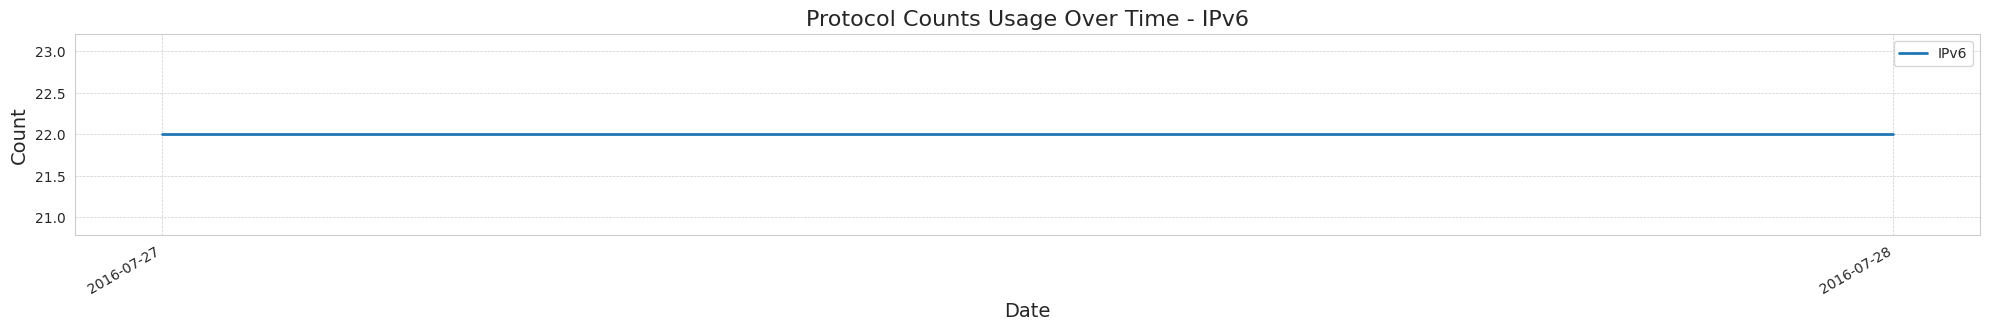

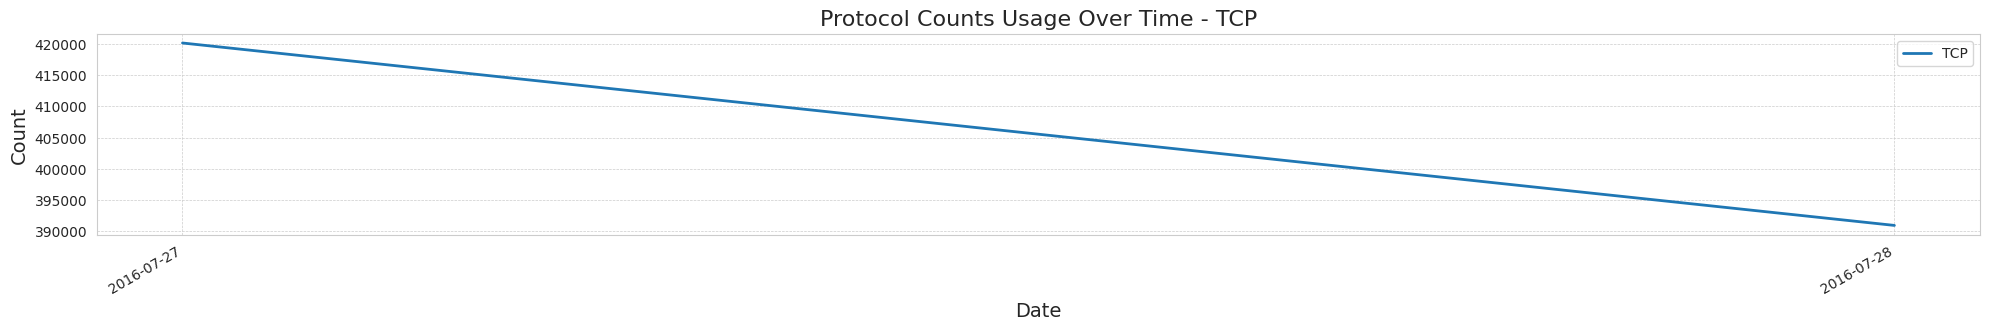

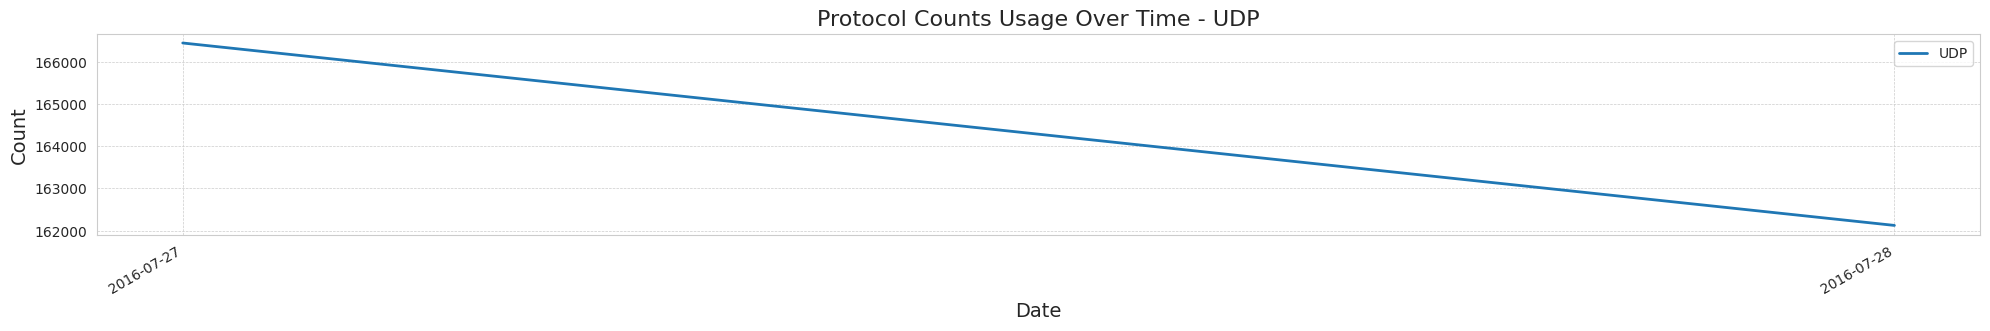

In [ ]:
fig_size = (20, 3)
for protocol in protocol_time_series.columns:
    plt.figure(figsize=fig_size)
    plt.plot(protocol_time_series.index, protocol_time_series[protocol], label=protocol, linewidth=2)
    plt.title(f'Protocol Counts Usage Over Time - {protocol}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.show()

For date-time range from July 27, 2016, to July 31, 2016, we can interpret and compare the usage over time of the different network protocols as follows:

- On July 27, TCP was the most utilized protocol, with UDP being the next most used but at a lower level. The remaining protocols were used much less, with ESP having very low usage and IPv6 being the least used.

- On July 28, all protocols experienced an increase in usage. TCP usage more than doubled and remained the highest. UDP also had a significant rise. ICMP usage increased noticeably, as did ESP. Both GRE and IPIP usage grew, with IPv6 seeing an increase, although it remained the least used.

- July 29 saw counts for TCP and UDP that were close to those on July 28, with TCP maintaining a slight edge over UDP. ICMP usage experienced a small increase. Slight growth was also noted in GRE and IPIP usage.

- On July 30, there was a reduction in TCP usage, and UDP saw a more noticeable decrease. GRE reached its peak usage for the period, while ICMP usage saw a reduction. Minor changes were observed in the usage of the other protocols.

- By July 31, there was a clear decrease in usage across all protocols. TCP saw a notable decrease but still had the highest usage. UDP underwent a significant decline, and ICMP usage dropped markedly. ESP, IPIP, and IPv6 all experienced decreases, with IPv6 remaining the least used.

**Top Active IP Addresses**
- Source IP
- Destination IP

In [ ]:
#how many unique IP address - Source
unique_values = len(ugr_df['source_ip'].unique())
print(f"Unique values in Source IP: {unique_values}")

unique_values = len(ugr_df['destination_ip'].unique())
print(f"Unique values in Destination IP: {unique_values}")

Unique values in Source IP: 109501
Unique values in Destination IP: 178094


In [ ]:
# Top 20 IP addresses to display
top_n = 20

# Count occurrences for source and destination IPs
source_ip_counts = ugr_df['source_ip'].value_counts().head(top_n)
destination_ip_counts = ugr_df['destination_ip'].value_counts().head(top_n)

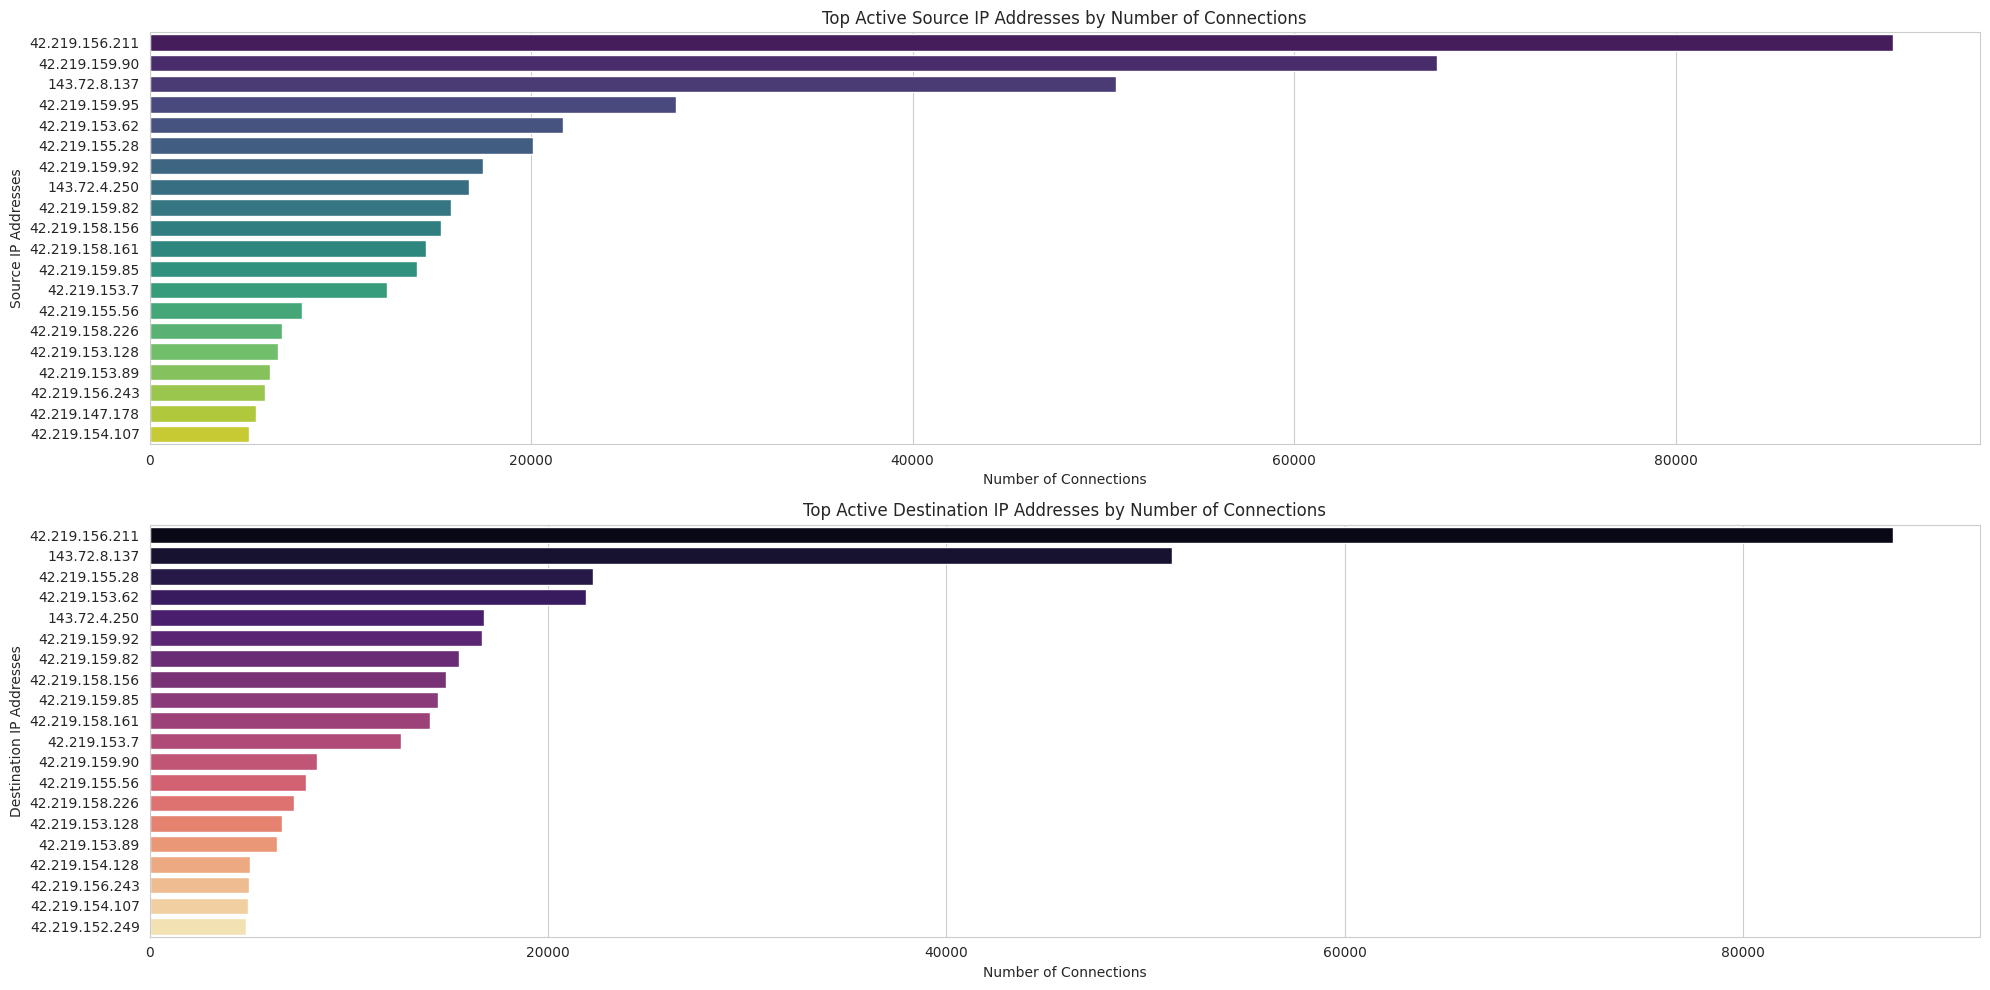

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

# Plot for Top Active Source IPs
sns.barplot(x=source_ip_counts.values, y=source_ip_counts.index, palette="viridis", ax=axs[0])
axs[0].set_title('Top Active Source IP Addresses by Number of Connections')
axs[0].set_xlabel('Number of Connections')
axs[0].set_ylabel('Source IP Addresses')

# Plot for Top Active Destination IPs
sns.barplot(x=destination_ip_counts.values, y=destination_ip_counts.index, palette="magma", ax=axs[1])
axs[1].set_title('Top Active Destination IP Addresses by Number of Connections')
axs[1].set_xlabel('Number of Connections')
axs[1].set_ylabel('Destination IP Addresses')
plt.tight_layout()
plt.show()

**Port Usage Analysis**
- Source Port
- Destination Port

In [ ]:
# Count occurrences of each source port
source_port_counts = ugr_df['source_port'].value_counts().head(20)
# Count occurrences of each destination port
destination_port_counts = ugr_df['destination_port'].value_counts().head(20)

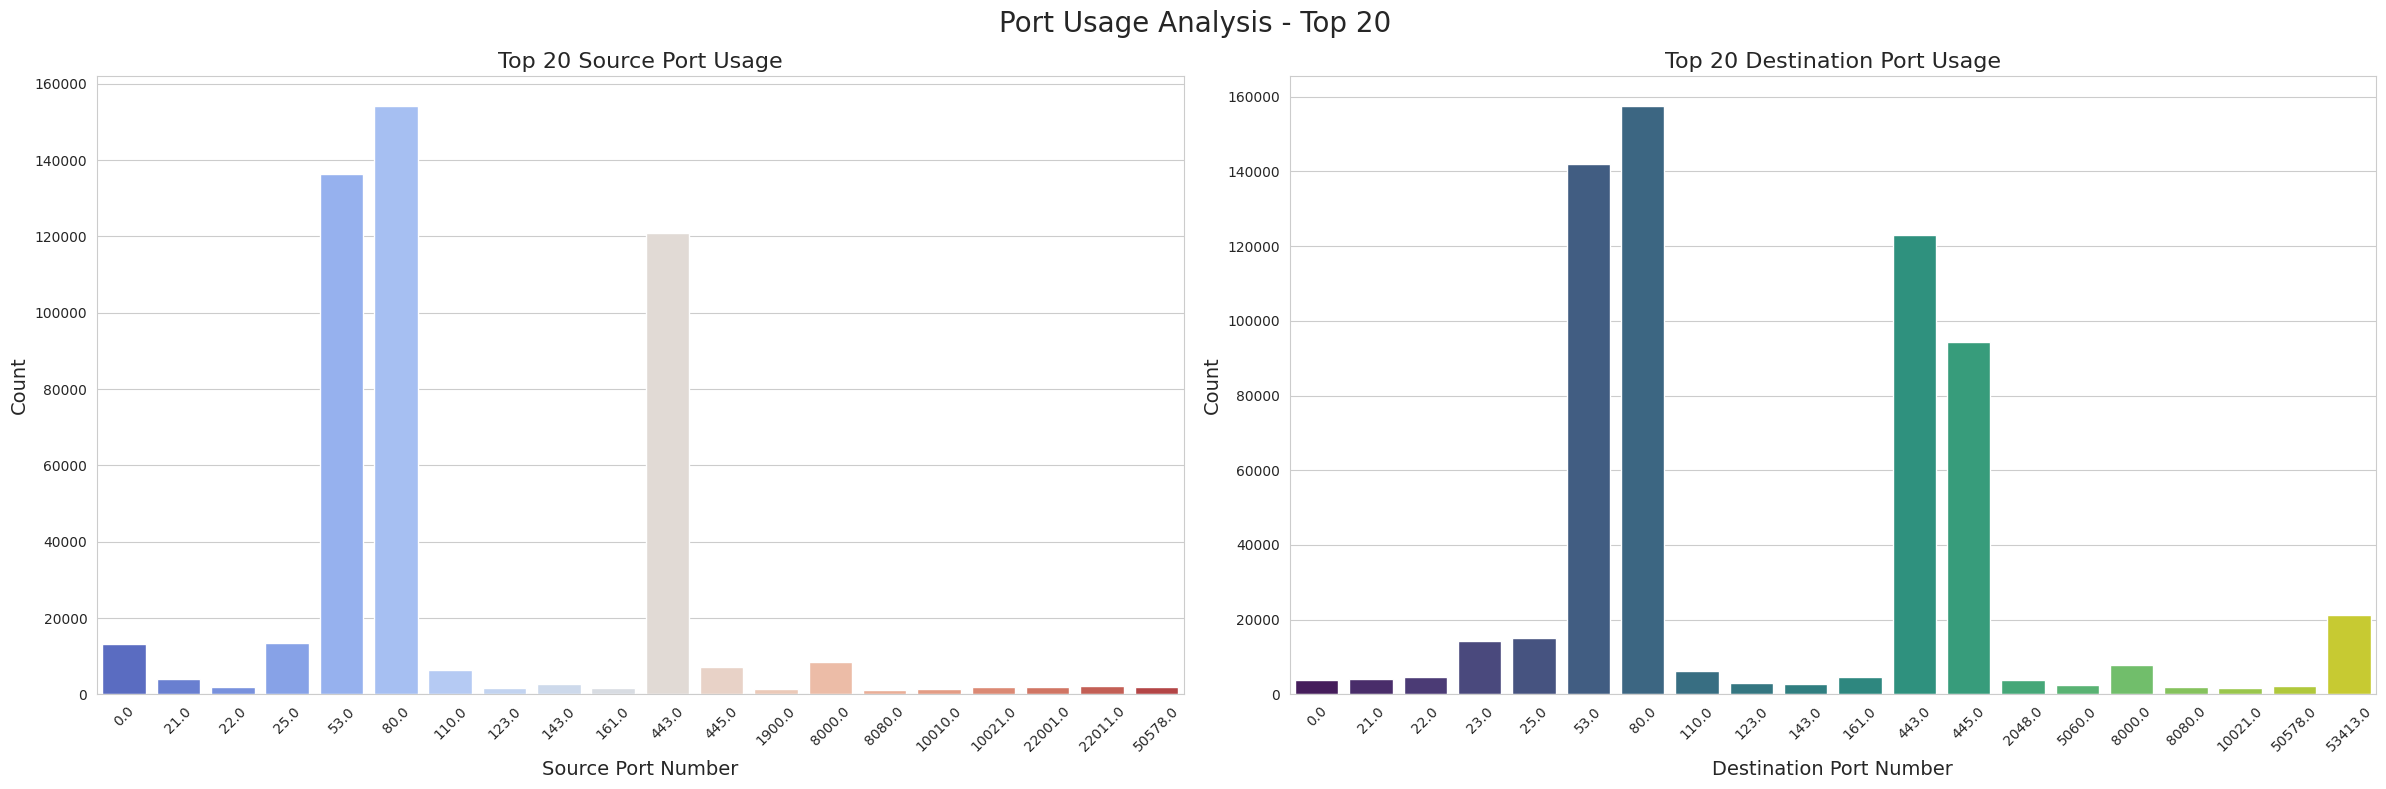

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot for Source Ports
sns.barplot(x=source_port_counts.index, y=source_port_counts.values, palette="coolwarm", ax=axs[0])
axs[0].set_title('Top 20 Source Port Usage', fontsize=16)
axs[0].set_xlabel('Source Port Number', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)
axs[0].tick_params(axis='x', rotation=45)

# Plot for Destination Ports
sns.barplot(x=destination_port_counts.index, y=destination_port_counts.values, palette="viridis", ax=axs[1])
axs[1].set_title('Top 20 Destination Port Usage', fontsize=16)
axs[1].set_xlabel('Destination Port Number', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)
axs[1].tick_params(axis='x', rotation=45)

plt.suptitle('Port Usage Analysis - Top 20', fontsize=20)
plt.tight_layout()
plt.show()

**Flags Analysis**

In [ ]:
flag_counts = ugr_df['flag'].value_counts()

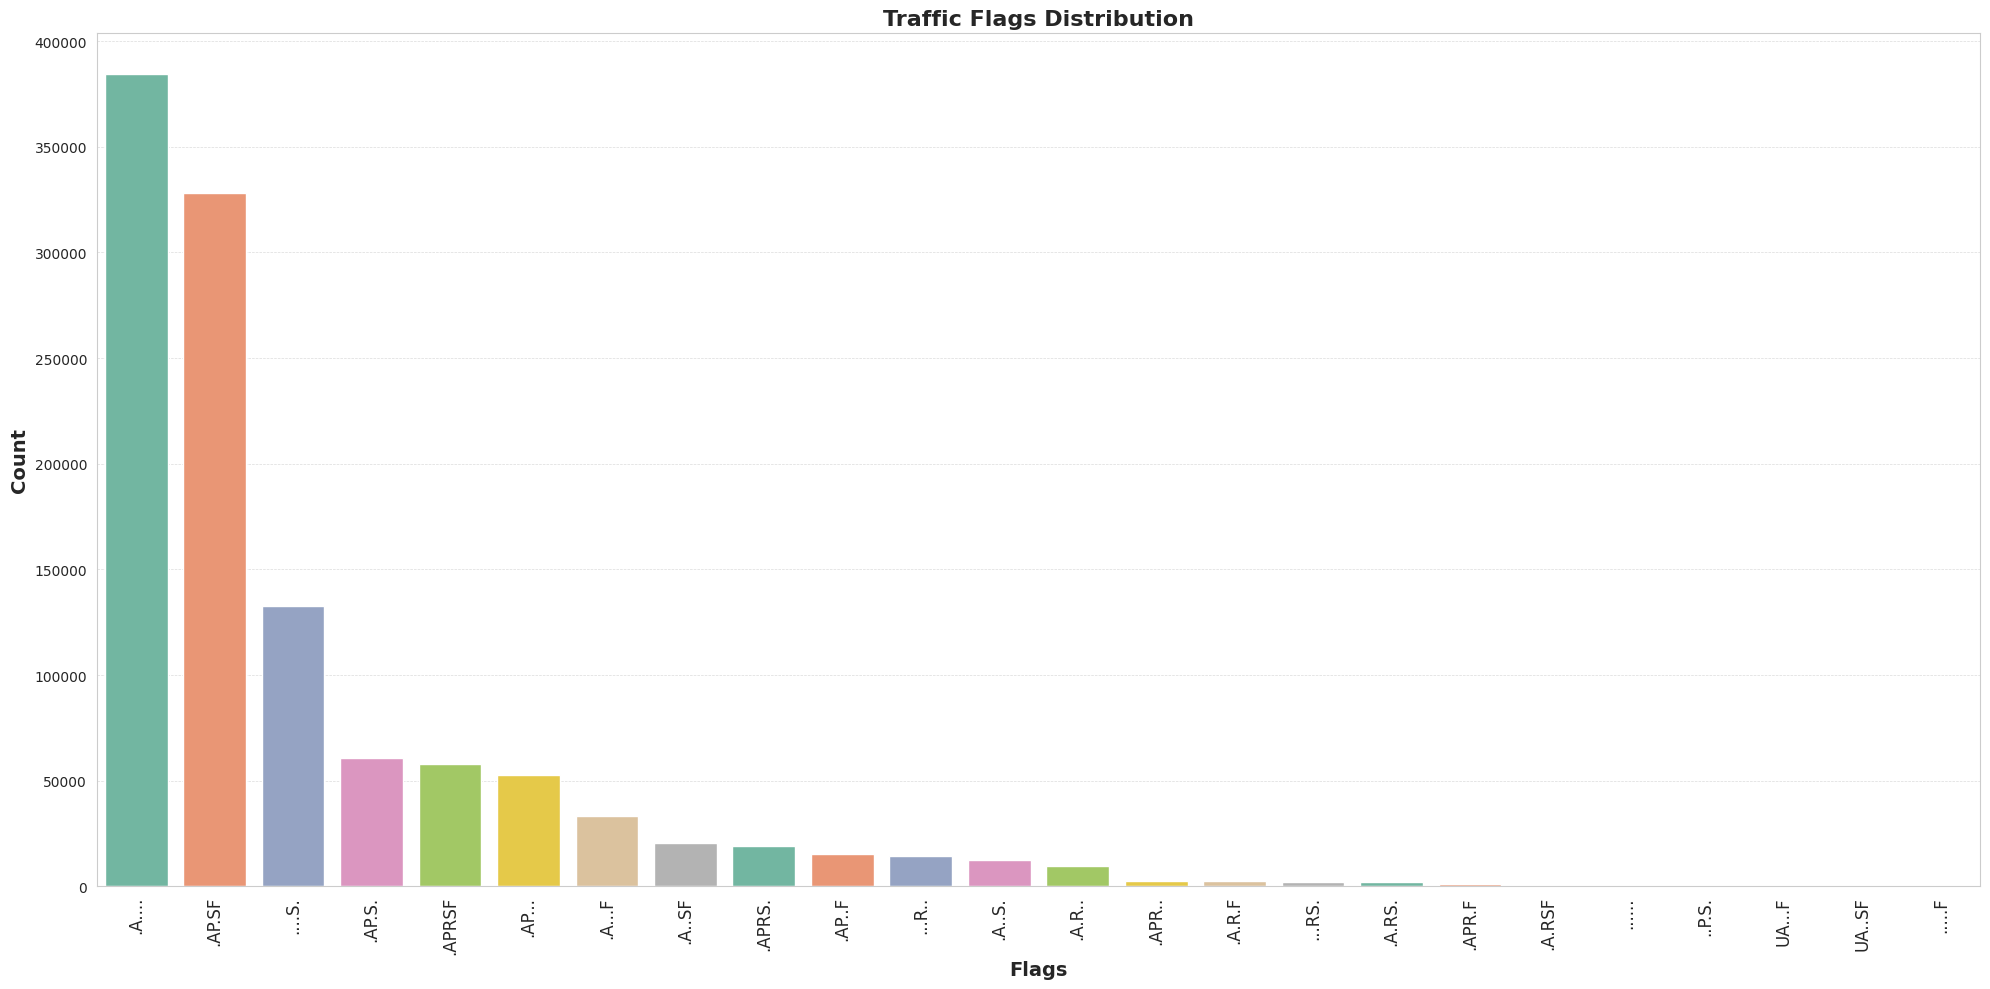

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x=flag_counts.index, y=flag_counts.values, palette="Set2")

plt.title('Traffic Flags Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Flags', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

**Duration Analysis**

In [ ]:
non_background_data = ugr_df[ugr_df['label'] != 'background']

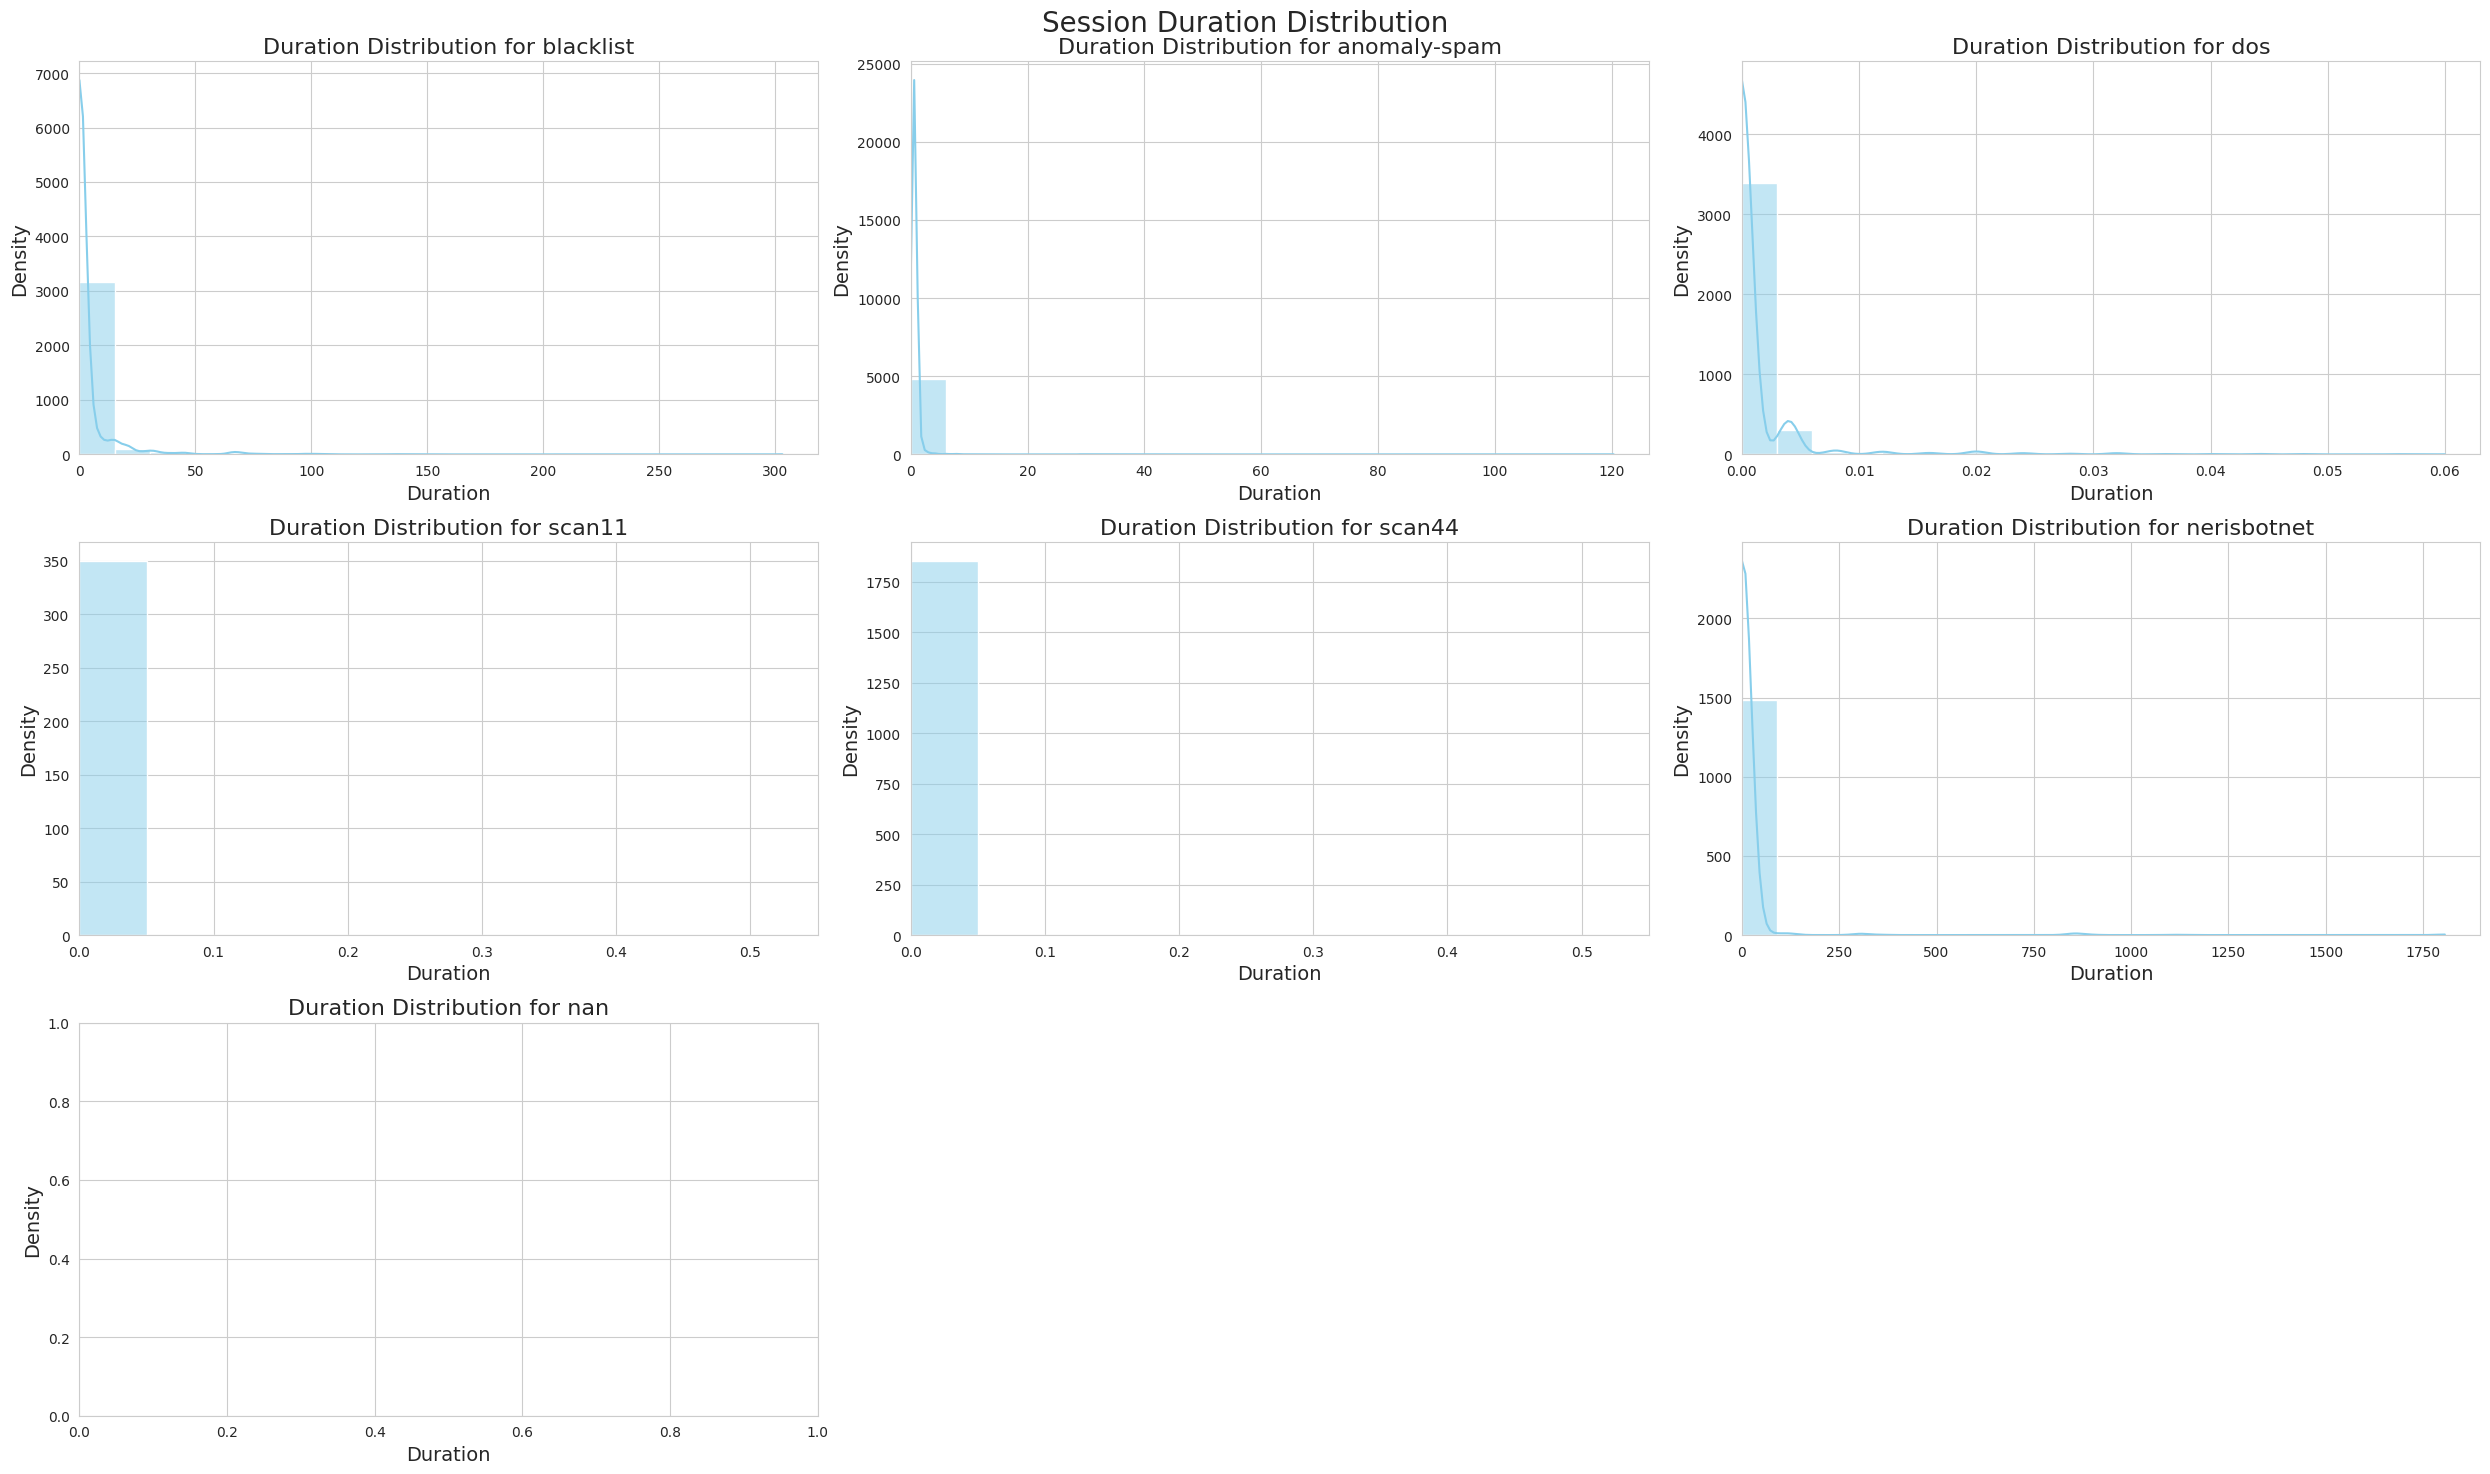

In [ ]:
unique_labels = non_background_data['label'].unique()

n_labels = len(unique_labels)
n_cols = 3
n_rows = (n_labels + n_cols - 1) // n_cols

plt.figure(figsize=(25, n_rows * 5))

for i, label in enumerate(unique_labels, 1):
    plt.subplot(n_rows, n_cols, i)
    label_data = non_background_data[non_background_data['label'] == label]

    sns.histplot(label_data['duration'], kde=True, color='skyblue', bins=20)
    plt.title(f'Duration Distribution for {label}', fontsize=16)
    plt.xlabel('Duration', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.xlim(left=0)
plt.suptitle('Session Duration Distribution', fontsize=20)
plt.tight_layout()
plt.show()

Data Statistical Distribution Over Each Label

In [ ]:
grouped_data = non_background_data.groupby('label')
label_descriptions = {}
for label, group in grouped_data:
    label_descriptions[label] = group.describe()
for label, description in label_descriptions.items():
    print(f"\nStatistics for label '{label}':")
    print(description)


Statistics for label 'anomaly-spam':
                           date_time     duration   source_port  \
count                           4826  4826.000000   4826.000000   
mean   2016-07-27 23:02:21.635930368     0.732952  23816.906962   
min              2016-07-27 16:11:43     0.000000     25.000000   
25%    2016-07-27 19:46:45.249999872     0.520000     25.000000   
50%              2016-07-27 22:59:31     0.568000  33110.500000   
75%    2016-07-28 02:13:21.249999872     0.700000  47341.750000   
max              2016-07-28 05:58:53   120.316000  60999.000000   
std                              NaN     2.443996  24199.963623   

       destination_port  forwarding_status          tos      packets  \
count       4826.000000             4826.0  4826.000000  4826.000000   
mean       23122.072938                0.0     0.716121     6.159138   
min           25.000000                0.0     0.000000     1.000000   
25%           25.000000                0.0     0.000000     5.000000  

**Duration:**
The 'dos' label has a very short duration, with a mean of 0.000681 and a maximum of 0.076.
On the other hand, the 'nerisbotnet' label has a longer duration, with a mean of 9.92 and a maximum of 1805.85.

**Source Port and Destination Port:**
There are variations in the range of source and destination ports across different labels. For example, 'anomaly-spam' has higher source and destination ports compared to 'scan11'.

**Packets and Bytes:**
'blacklist' has the highest mean number of packets and bytes compared to other labels, indicating potentially more substantial traffic.
'scan11' and 'scan44' have very low mean numbers of packets and bytes compared to other labels, suggesting potentially less intense scanning activities.

**TOS (Type of Service):**
The 'anomaly-spam' label has a non-zero mean TOS value, while other labels have a mean TOS of zero, indicating potential differences in the type of service for this label.

**Forwarding Status:**
All labels have a forwarding status of 0, indicating no forwarding.

**Temporal Heatmap of Activity**

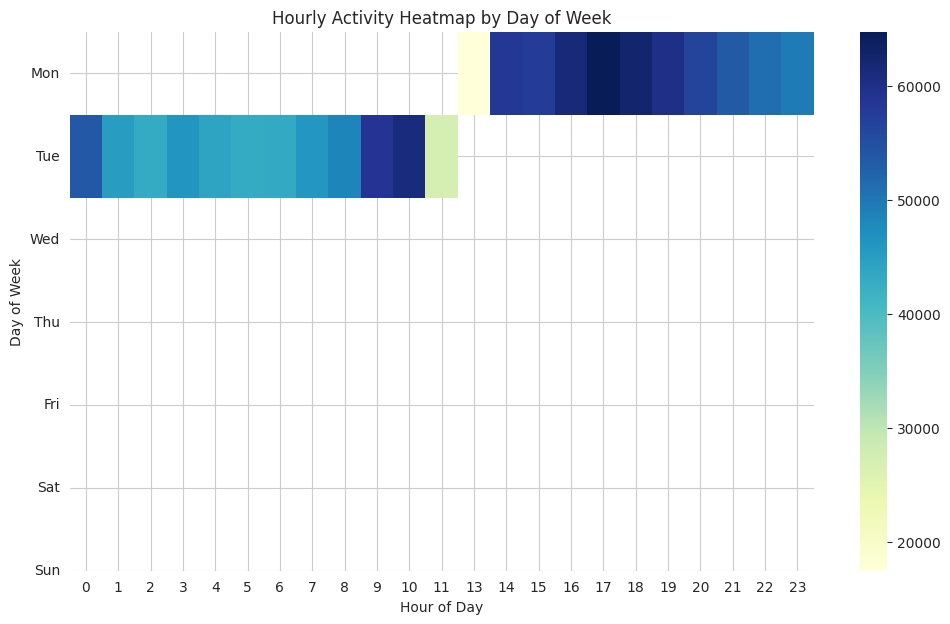

In [ ]:
ugr_df['hour'] = ugr_df['date_time'].dt.hour
ugr_df['day_of_week'] = ugr_df['date_time'].dt.dayofweek
heatmap_data = ugr_df.groupby(['day_of_week', 'hour']).size().unstack()

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Hourly Activity Heatmap by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(ticks=np.arange(0.5, 7.5), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

Activity is higher in the later hours of the day, particularly between late afternoon and midnight. The darkest shades, indicating the highest activity levels, consistently appear in the evening hours.

- There is a pronounced peak of activity during the evening on Tuesday, which appears to be the time with the highest overall activity within the week.

- Monday and Wednesday evenings also show high activity, although not quite as intense as Tuesday.

- Activity on Thursday and Friday seems to be relatively consistent throughout the day, with a slight increase in the evening, but not as pronounced as the earlier days of the week.

**Forwarding Status**


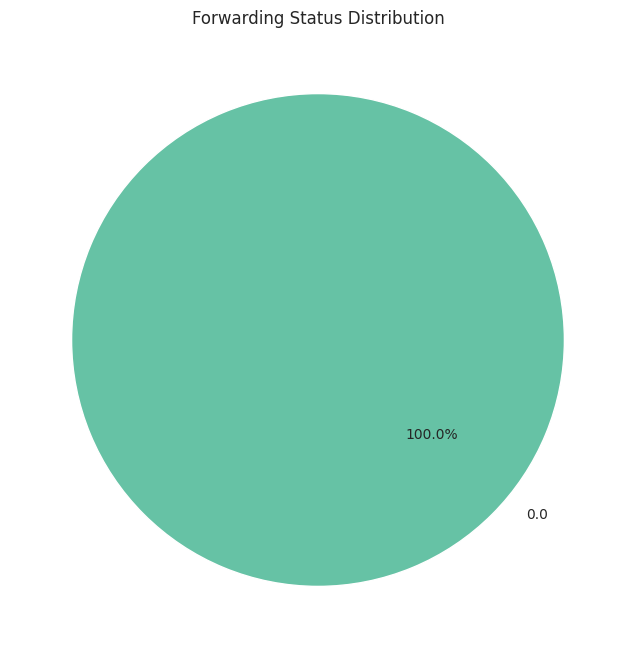

In [ ]:
status_counts = ugr_df['forwarding_status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Forwarding Status Distribution')
plt.show()

It contains all the same values, 0. So it should be dropped.

In [ ]:
ugr_df.drop(columns=['forwarding_status'], inplace=True)

**ToS (Type of Service)**

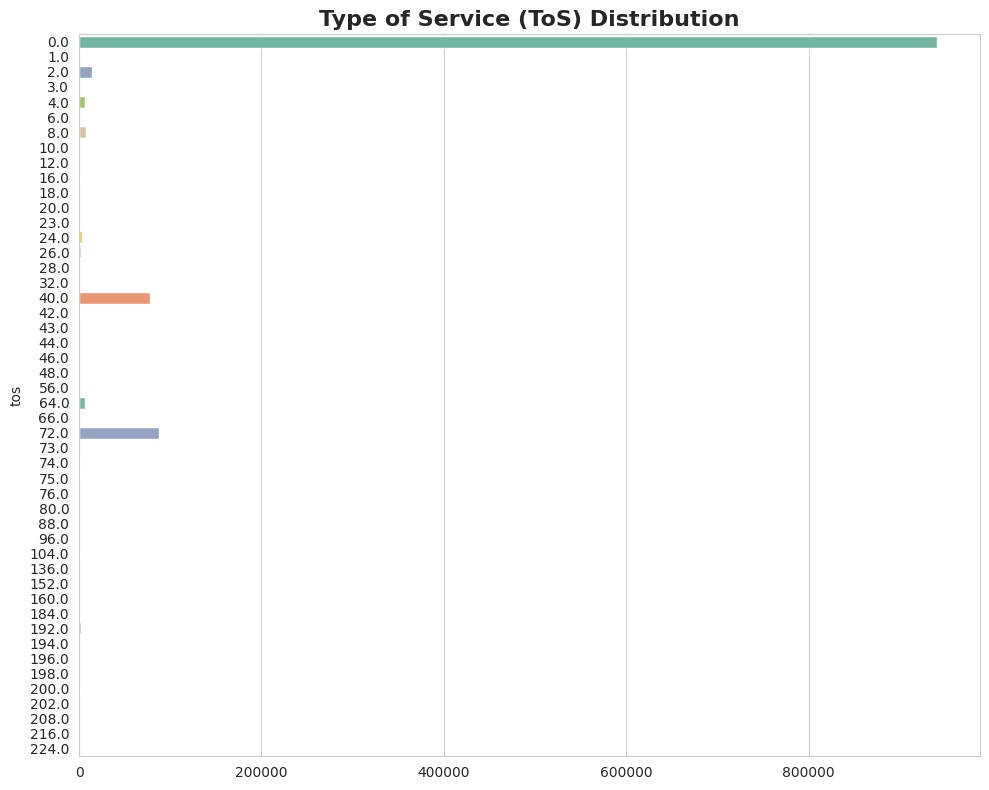

In [ ]:
tos_counts = ugr_df['tos'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
sns.barplot(x=tos_counts.values, y=tos_counts.index, palette="Set2", orient='h')
plt.title('Type of Service (ToS) Distribution', fontsize=16, fontweight='bold')
# plt.xlabel('Count', fontsize=14)
# plt.ylabel('ToS Values', fontsize=14)
plt.tight_layout()
plt.show()

**Label Distribution**

Binary Lable Distribution

In [ ]:
ugr_df['bin_label'] = np.where(ugr_df['label'] == 'background', 'background', 'attack')

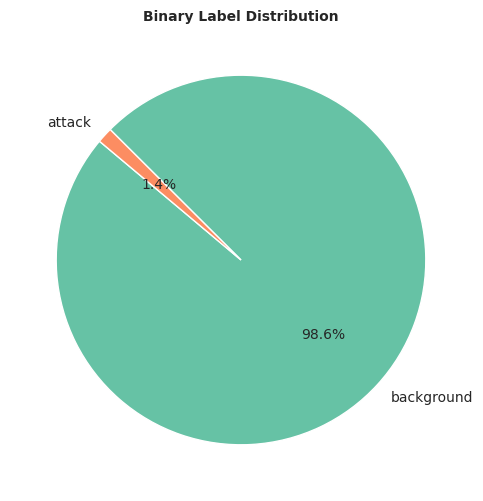

In [ ]:
label_counts = ugr_df['bin_label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette("Set2"))
plt.title('Binary Label Distribution', fontsize=10, fontweight='bold')
plt.show()

Background is almost 98.6% in our data so is highly available so, we would exclude it from the label distribution and see attacks which is only 1.4% in our data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/UGR/UGR_sample_5M.csv')

label_counts = ugr_df['label'].value_counts()
label_counts_filtered = label_counts[label_counts.index != 'background']


# Print the filtered label counts
print("Filtered label distribution (excluding 'background'):")
print(label_counts_filtered)

# Plot the filtered label distribution as a bar chart
label_counts_filtered.plot(kind='bar')
plt.title('Label Distribution (Excluding Background)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/azizah_alqahtani_project/UGR/UGR_sample_5M.csv'

In [ ]:
label_counts = ugr_df['label'].value_counts()
label_counts_filtered = label_counts[label_counts.index != 'background']

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(x=label_counts_filtered.values, y=label_counts_filtered.index, palette="rocket", ax=axs[0])
axs[0].set_xlabel('Count', fontsize=14)
axs[0].set_ylabel('Label', fontsize=14)
axs[1].pie(label_counts_filtered, labels=label_counts_filtered.index,
           autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.suptitle('Label Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In the dataset, 'dos' incidents are the most prevalent, making up just over 40% of the total. 'Blacklist' occurrences are the next most common at around 20%, with 'scan44' not far behind. 'Nerisbotnet' constitutes about 9% of the data. The least common categories are 'anomaly-spam' and 'scan11', with the latter being the smallest segment at 4.1%.

In [ ]:
non_background_data = non_background_data.copy()
non_background_data['date'] = non_background_data['date_time'].dt.date
label_counts_by_date = non_background_data[non_background_data['label'] != 'background'].groupby(['date', 'label']).size().reset_index(name='count')
plt.figure(figsize=(15, 6))
sns.barplot(data=label_counts_by_date, x='date', y='count', hue='label', palette='bright')
plt.title('Counts of Attacks for Each Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()
plt.show()

**Final Data Label Distribution Statement**

So, the dataset largely consists of benign 'background' activity, constituting 98.6% of the network environment, suggesting a stable and secure setting. However, a small segment, 1.4%, is categorized as 'attack', indicating the presence of network threats. Among these, 'dos' incidents emerge as the most frequent type of attack, although they represent only a fraction of the overall network activity.



So, the original dataset is very large so we will use the only data for date 28,07,2016.

In [ ]:
ugr_df.drop(columns=['hour', 'day_of_week'], inplace=True)

In [ ]:
ugr_df.dtypes

Saving the Sample of Data for Our Work

In [ ]:
filtered_df = ugr_df[ugr_df['date_time'].dt.date == pd.to_datetime('2016-07-28').date()]

In [ ]:
filtered_df['date_time'].dt.date.value_counts() #data for only 2016-07-29

In [ ]:
import pandas as pd
import os  # Import the os module for directory operations

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/UGR/UGR_sample_5M.csv')


print(data.columns)

# Define the labels you want to extract
labels_to_extract = ['dos', 'blacklist', 'scan44', 'nerisbotnet', 'anomaly-spam', 'scan11']

# Filter the data to include only the specified labels
labeled_samples = data[data['label'].isin(labels_to_extract)]

# Print the first few rows of the labeled samples to verify the extraction
print(labeled_samples.head())

# Optionally, you can shuffle the labeled samples (recommended)
labeled_samples = labeled_samples.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the save directory
save_dir = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define the file path to save the labeled samples
save_path = os.path.join(save_dir, 'labeled_samples.csv')

# Save the labeled samples to the specified file path
labeled_samples.to_csv(save_path, index=False)

print(f"Labeled samples saved to {save_path}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv')

# Calculate the value counts for the 'label' column
label_counts = data['label'].value_counts()

#Calculate the total number of samples
total_samples = data.shape[0]

# Print the total number of samples
print(f"The total number of samples in the dataset: {total_samples}")

# Print the label distribution
print("Label distribution:")
print(label_counts)

# Plot the label distribution as a bar chart
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/UGR/UGR_sample_5M.csv')

# Filter the data to include only the 'background' label
background_data = data[data['label'] == 'background']

# Resample the 'background' data to obtain 68,213 samples
#background_sample = resample(background_data, n_samples=68213, random_state=42)

# Resample the 'background' data to obtain 68,213 samples
background_sample = resample(background_data, n_samples=15485, random_state=42)

# Output the background sample
print(background_sample)

# Optionally, you can save the background sample to a new CSV file
save_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv'
background_sample.to_csv(save_path, index=False)

print(f"Background sample saved to {save_path}")


In [ ]:
import pandas as pd

# Load the 'background_sample.csv' file
background_sample = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv')

# Load the 'labeled_samples.csv' file
labeled_samples = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv')

# Concatenate the two dataframes to create a mixed dataset
mixed_dataset = pd.concat([background_sample, labeled_samples])

# Shuffle the mixed dataset
# frac=1 means shuffle the entire dataset, and random_state is used for reproducibility
shuffled_dataset = mixed_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the shuffled dataset to a new CSV file
save_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv'
shuffled_dataset.to_csv(save_path, index=False)

print(f"Shuffled mixed dataset saved to {save_path}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/mixed_dataset_shuffled.csv')

# Calculate the value counts for the 'label' column
label_counts = data['label'].value_counts()

#Calculate the total number of samples
total_samples = data.shape[0]

# Print the total number of samples
print(f"The total number of samples in the dataset: {total_samples}")

# Print the label distribution
print("Label distribution:")
print(label_counts)

# Plot the label distribution as a bar chart
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Label Distribution



Binary Lable Distribution

In [ ]:

data['bin_label'] = np.where(data['label'] == 'background', 'background', 'attack')
label_counts = data['bin_label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette("Set2"))
plt.title('Binary Label Distribution', fontsize=10, fontweight='bold')
plt.show()